# Capítulo 11. Regresión Linear Simple


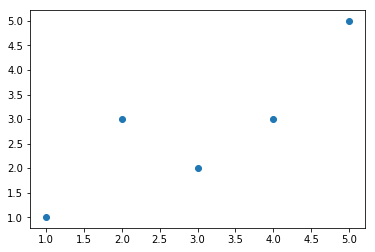

In [1]:
%matplotlib inline

from numpy import array
from matplotlib import pyplot 

x = array([1, 2, 4, 3, 5])
y = array([1, 3, 3, 2, 5])

pyplot.scatter(x, y)
pyplot.show()

In [2]:
from numpy import corrcoef, std, mean, sqrt

class SimpleLinearRegression:
    
    def __init__(self, x, y):
        "Class to calculate the simple linear regression y = B0 + B1 * x"
        self.b1 = self._calculate_b1(x, y)
        self.b0 = self._calculate_b0(x, y)
        self.predicted_y = self.predict(x)
        self.rmse = self._calculate_rmse(x, y)
        
    def _calculate_b1(self, x, y):
        "Calculate the slope B1"
        corr_x_y = corrcoef(x, y)[0, 1] # Calculate pearson correlation coeffient
        std_x    = std(x)               # Calculate standard deviation x
        std_y    = std(y)               # Calculate standard deviation y
        
        return corr_x_y * std_y / std_x
    
    def _calculate_b0(self, x, y):
        "Calculate the bias B0"
        mean_x = mean(x) # Calculate mean x
        mean_y = mean(y) # Calculate mean y
        
        return mean_y - self.b1 * mean_x
    
    def _calculate_rmse(self, x, y):
        "Calculate the Root Mean Squared Error or RMSE"
        error = self.predicted_y - y  # Calculate the error from predicted y
        squared_error = error ** 2    # Calculate the squared error
        n = y.size                    # n = size of the dataset
        
        return sqrt(sum(squared_error) / n)
    
    def predict(self, x):
        return x * self.b1 + self.b0

In [3]:
slr = SimpleLinearRegression(x, y)

In [4]:
slr.b0

0.39999999999999947

In [5]:
slr.b1

0.8

In [6]:
slr.rmse

0.692820323027551

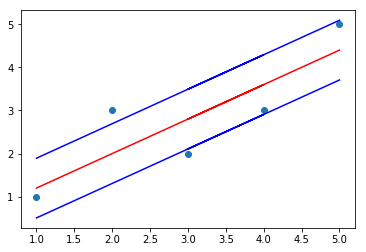

In [7]:
pyplot.scatter(x, y)
pyplot.plot(x, slr.predicted_y, color= 'red')
pyplot.plot(x, slr.predicted_y + slr.rmse, color= 'blue')
pyplot.plot(x, slr.predicted_y - slr.rmse, color= 'blue')
pyplot.show()